
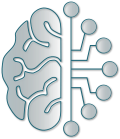

**D√©but √†:** Sunday 03 December 2023, 15:09:00  
**Hostname:** ip-sw-install-nico.insa-toulouse.fr (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

# Traitement statistique de donn√©es<br>(data science pour d√©butants)<br><br>Statistical treatment of data<br>(data science for beginners)*

## Statistiques et r√©gression<br>*Statistics and regression*

### R√©gression lin√©aire<br>*linear regression*

<div class="intro">

En statistiques, en √©conom√©trie et en apprentissage automatique (machine learning), un mod√®le de r√©gression lin√©aire est un **mod√®le** qui cherche √† √©tablir une relation lin√©aire entre une variable <i>y</i> et une  variable <i>x</i> qui sont toutes deux tir√©es d'observations. L'incertitude sur ces observations entra√Æne que le trac√© de la variable <i>y</i> en fonction de <i>x</i> s'apparente le plus souvent √† un nuage de points, comme sur la figure ci-dessous.

Dans le cadre d'un mod√®le lin√©aire simple, **l'optimisation de ce mod√®le** permet de d√©terminer :
- la droite de r√©gression, qui est la droite qui **passe au plus pr√®s de l'ensemble des points** (repr√©sent√©e en rouge sur la figure ci-dessous)
- les param√®tres *a* et *b* de la droite d'√©quation $\hat{y}=ax+b$. *a* est le coefficient directeur (la pente) et *b* est l'ordonn√©e √† l'origine
- l'incertitude sur chacun de ces param√®tres
- le coefficient de d√©termination *R<sup>2</sup>*, qui est une mesure de la qualit√© de la r√©gression lin√©aire
<p style="text-align: center"><img width="600px" src="DS4B-svg/fct1.png" style="margin-left:auto; margin-right:auto" id="img_fct1"/></p>
</div>
<div class="introE">

In statistics, econometrics and machine learning, a linear regression model is a **model** that aims at establishing a linear relationship between a variable <i>y</i> and a variable <i>x</i>, both of which are derived from observations. The uncertainty about these observations means that the plot of the variable <i>y</i> as a function of <i>x</i> most often looks like a scatter plot, as in the figure above.
    
In the context of a simple linear model, **the optimization of this model** allows to determine:

- the regression line, which is the line that passes closest to the set of points (shown in red in the figure above)
- the parameters *a* and *b* of the line with equation $\hat{y}=ax+b$. *a* is the slope (or gradient) and b is the *y*-intercept
- the uncertainty on each of these parameters
- the coefficient of determination *R<sup>2</sup>*, which is a measure of the accuracy of the linear regression
</div>
<br>
<div class=rq>
<b>Pourquoi un chapeau sur $\hat{y}$ ?</b> <br>
Car l'expression $\hat{y}=ax+b$ va permettre de faire une <b>pr√©diction</b> de la variable $y$ pour n'importe quelle valeur de $x$, pas seulement pour celles qui sont repr√©sent√©es sous forme de nuage de points et qui ont servi √† d√©terminer $a$ et $b$
</div>
<div class=rqE>
<b>Why a hat on $\hat{y}$?</b> <br>
Because the expression $\hat{y}=ax+b$ will allow the <b>prediction</b> of the $y$ variable for any $x$ value, not just for those represented as a scatterplot and that have been used to fit $a$ and $b$
</div>

#### Chargement des biblioth√®ques utiles<br>*importation of the usueful libraries*

<div class="intro">

On va importer dans notre environnement de travail :
- `pylab`, tr√®s utile pour de la programmation scientifique avec python
- `pandas`, qui permet de lire des tableaux au format excel ou csv, et de les manipuler en tant que "dataframes"
- `numpy`, destin√©e √† manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions math√©matiques op√©rant sur ces tableaux
- `linregress`, qui fait partie de la biblioth√®que statistique `scipy`
    
</div>
<div class="introE">

We are going to import in our working environment :

- `pylab`, very useful for scientific programming with python
- `pandas`, which allows to read tables in excel or csv format, and to work on them as dataframes
- `numpy,` to manipulate matrices or multidimensional arrays and mathematical functions operating on these arrays
- `linregress`, which is part of the `scipy` statistical library
    
</div>

In [2]:
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np
from scipy.stats import linregress

<div class=rq>
    
<b>Attention !</b> <br>
La biblioth√®que `SciPy` utilise les tableaux et matrices au format `NumPy`. <br>
Il faudra donc convertir tout tableau au format `pandas` en tableau au format `NumPy`
</div>
<div class=rqE>
    
<b>Attention !</b> <br>
The `SciPy` library uses arrays and matrices in `NumPy` format. <br>
You will have to convert any `pandas` dataframe into an array in `NumPy` format
</div>

#### Visualisation des donn√©es<br>*Data visualization*

<div class="intro">

Dans les lignes de code ci-dessous :
- on charge la base de donn√©es iris, qui va √™tre stock√©e au format pandas dans le dataframe `dfi`
- on trace la longueur des p√©tales (`petal_length`) en fonction de leur largeur (`petal_width`)
- on a arbitrairement choisi d'assigner la longueur des p√©tales √† $y$ et la largeur √† $x$ 
</div>

<div class="introE">

In the lines of code below :

- we load the iris database, which will be stored in pandas format in the `dfi` dataframe
- we plot the length of the petals (`petal_length`) according to their width (`petal_width`)
- we arbitrarily chose to assign the petal length to $ùë¶$ and the width to $ùë•$
</div>

<Axes: xlabel='petal_width', ylabel='petal_length'>

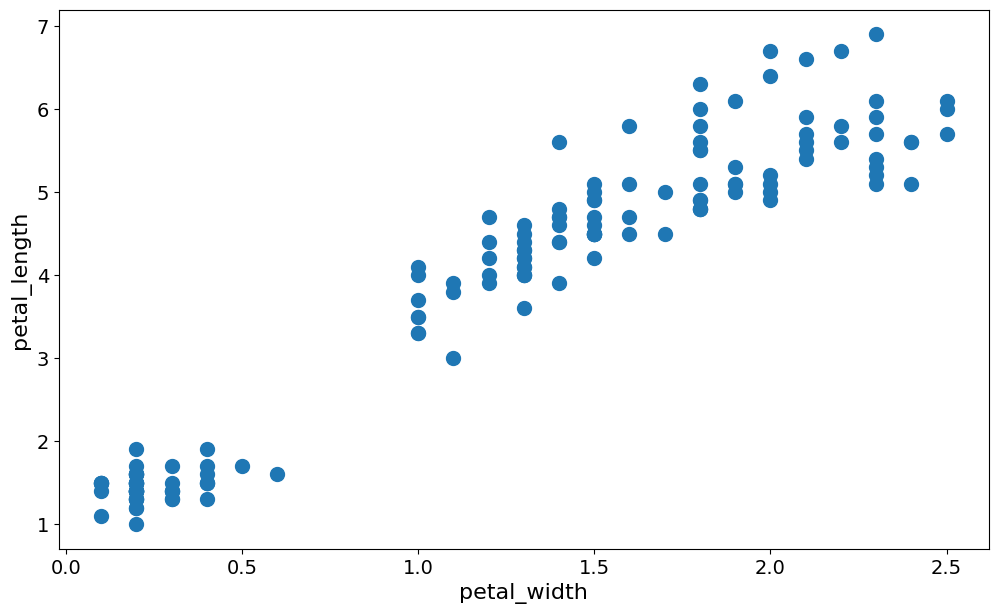

In [3]:
dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
plt.rcParams["figure.figsize"] = (12,7) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (16) #on ajuste la taille des caract√®res
dfi.plot(x="petal_width", y="petal_length", kind='scatter', marker='o',s=100, fontsize=14)

<div class="rq">
    Il semble bien, <i>de visu</i>, qu'il y ait une relation lin√©aire entre longueur et largeur des p√©tales
</div>

<div class="rqE">
    Visually, there seems to be a linear relationship between the length and width of the petals
</div>

#### Utilisation de la fonction `linregress` (module `SciPy`)<br>Fit with the `linregress` function(`SciPy` library)
<div class="intro">
    
Comme pr√©vu, on convertit les variables au format `pandas` en variables au format `NumPy`. <br>
On utilise pour cela la fonction <code>to_numpy()</code>
- la largeur de p√©tales des 150 √©chantillons est stock√©e dans une variable `pw` (comme petal width)
- leur longueur est stock√©e dans une variable `pl` (pour petal length)

</div>
<div class="introE">
    
As planned, we convert the variables in `pandas` format into variables in `NumPy` format.<br>
We use the function `to_numpy()` for this purpose

- the petal width of the 150 samples is stored in a variable `pw` (for petal width)
- their length is stored in a variable `pl` (for petal length)
</div>


In [4]:
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
print("petal width au format numpy")
display(pw)
print("petal length au format numpy")
display(pl)

petal width au format numpy


array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

petal length au format numpy


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

<div class="rq">
√áa ressemble bien √† un tableau au format `NumPy`</div>
<div class="rqE">
It looks like a `NumPy` table</div>

<div class="intro">

On peut maintenant appeler la fonction `linregress`.<br>
Elle va renvoyer la pente (`slope`), l'ordonn√©e √† l'origine (`intercept`), l'erreur sur la pente (`stderr`), l'erreur sur l'ordonn√©e √† l'origine (`intercept_stderr`), le coefficient de corr√©lation (`rvalue`).
    
- on appelle `linregress` et on sauve le r√©sultat dans une variable `fit`
- puis on va r√©cup√©rer les param√®tres de la droite et la pr√©cision de l'optimisation ("du fit")
- enfin on affiche les param√®tres (ne vous laissez pas impressionner par l'affichage formatt√©, pour un rendu plus propre)
</div>
<div class="introE">
    
We can now call the `linregress` function.
It will return the `slope`, the `intercept`, the error on the slope (`stderr`), the error on the intercept (`intercept_stderr`), the correlation coefficient (`rvalue`).

- we call `linregress` and save the result in a `fit` variable
- then we extract the parameters of the line and the accuracy of the optimization ("of the fit")
- finally we display the parameters (don't let yourself be impressed by the formatted display, whose interest is a cleaner rendering)
</div>
<br>
<div class="rq">

<b>Remarque</b>. Dans le cas de la r√©gression lin√©aire, le **coefficient de d√©termination** $R^2$ ("R-carr√©") est le carr√© du coefficient de corr√©lation $R$.

</div>
<div class="rqE">

<b>Comment</b>. In the linear regression case, the **determination coefficient** $R^2$ ("R squared") is simply the square of the sample correlation coefficient $R$.

</div>

In [5]:
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonn√©e √† l'origine ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Erreur standard sur la valeur de la pente =   0.051
Erreur standard sur la valeur de l'ordonn√©e √† l'origine =   0.073


<div class="rq">
    
On n'est pas oblig√© de formatter la sortie. Voici des instructions `print()` basiques
</div>
<div class="rqE">
    
You don't have to format the output. Here are some basic `print()` instructions
</div>

In [6]:
print("a=",a)
print("b=",b)
print("R2=",r**2)
print("erreur pente=",stderr)
print("erreur OO=",istderr)

a= 2.2258853065539115
b= 1.0905721458773772
R2= 0.9269012279220042
erreur pente= 0.05138190916478042
erreur OO= 0.07294301009148557


<div class="rq">
Mais... c'est peu lisible, et on n'a pas besoin d'autant de chiffres significatifs d'o√π, <i>in fine</i>, l'int√©r√™t de formatter la sortie</div>

<div class="rqE">
But... it's not very readable, and we don't need so many significant numbers, hence the interest of formatting the output</div>

#### Repr√©sentation graphique des r√©sultats<br>*Graphical representation of results*
<div class="intro">

On va utiliser la fonction `plot()`. 

On veut √† la fois :
- tracer les valeurs $y$ en fonction de $x$
- v√©rifier que la r√©gression lin√©aire semble juste, c'est-√†-dire que la droite d'√©quation $\hat{y}=ax+b$ passe bien au plus pr√®s de l'ensemble des points 

Dans les lignes de code python ci-dessous :
- on d√©finit la fonction `y_hat` (y chapeau...) qui va renvoyer $ax+b$ pour toute valeur de $x$ ($a$, $b$, $x$ sont pass√©s en param√®tre de `y_hat`)
- on appelle `plot` deux fois
    - pour tracer le nuage de points ($x$,$y$)
    - pour tracer la droite `y_hat`
</div>
<div class="introE">

We will use the `plot()` function.

We want to both:
- plot the $y$ values as a function of $x$
- check that the linear regression looks right, *i.e.*, that the line with equation $\hat{y}=ax+b$ passes as close as possible to the set of points

In the python code below:
- we define the function `y_hat` which will return $ax+b$ for any $x$ value ($a$, $b$, $x$ are parameters of `y_hat`)
- `plot` is called twice
    - to get an ($x$,$y$) scatter plot
    - to superpose the `y_hat` line
</div>

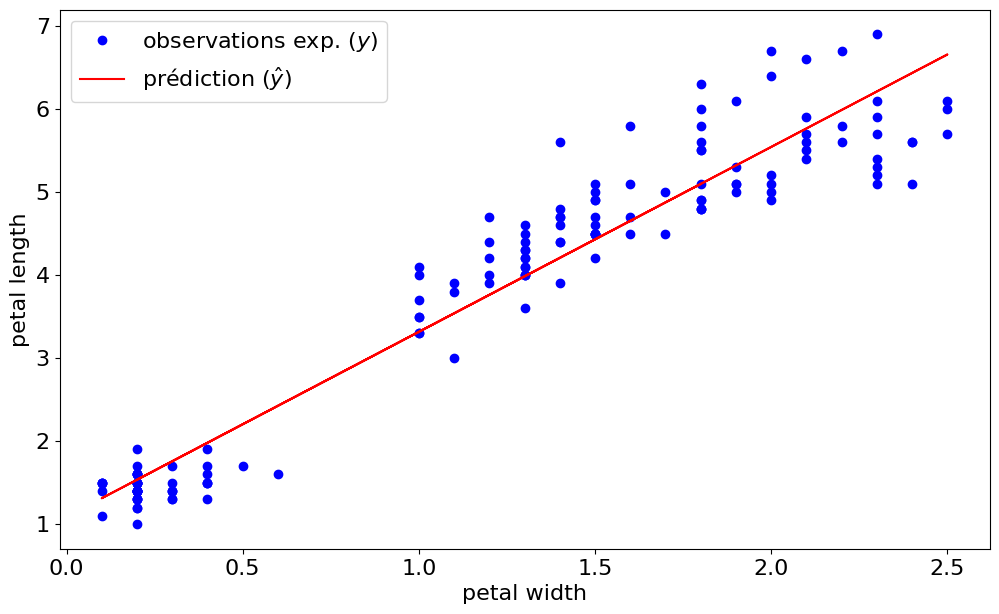

In [7]:
def pl_hat(a,b,x):
    return a * x + b

plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plot(pw,pl_hat(a,b,pw),color='red',label='pr√©diction ($\hat{y}$)')
xlabel("petal width") # label de l'axe des abscisses
ylabel("petal length") # label de l'axe des ordonn√©es
plt.legend() #affichage de la l√©gende sur le graphe

<div class="rq">
    <b>En r√©sum√© :</b>
<li> le coefficient de d√©termination $R^2$ est proche de 1
<li> les erreurs sur l'OO et sur la pente sont faibles
<li> les points exp√©rimentaux ont l'air bien r√©partis de part et d'autre de la droite
<br><b> Il est donc plut√¥t convaincant que la largeur et la longueur des p√©tales soient reli√©es par une relation lin√©aire</b>
</div>

<div class="rqE">
<b>In summary:</b>
<li> the coefficient of determination R^2$ is close to 1
<li> the errors on the y-intercept and on the slope are small
<li> the experimental points look well distributed on both sides of the line
<br><b> Thus, it is rather convincing that petal width and length are related by a linear relationship</b>
</div>

#### Validit√© du mod√®le lin√©aire : erreurs moyennes et r√©sidus<br>*Validity of the linear model: average errors and residuals*

<div class="intro">

En statistiques, l'erreur moyenne absolue (en anglais <b>MAE</b> = Mean Absolute Error) est calcul√©e √† partir de la diff√©rence entre les valeurs observ√©es, $y(x_i)$, et les valeurs pr√©dites par un mod√®le de r√©gression, $\hat{y}(x_i)$. La MAE est la moyenne arithm√©tique des erreurs calcul√©es pour chacun des points $x_i$ qui a servi √† optimiser le mod√®le de r√©gression.

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|y(x_{i}-\hat{y}(x_{i})\right|$$

On trouve souvent une autre mesure d'erreur, l'erreur quadratique moyenne (en anglais **MSE** = Mean Squared Error), qui se calcule aussi √† partir de $y(x_i)$ et $\hat{y}(x_i)$ :

$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left[y(x_{i}-\hat{y}(x_{i})\right]^{2}$$

La biblioth√®que `scikit-learn` fournit deux utilitaires qui permettent de calculer MAE (fonction `mean_absolute_error`) ou MSE (fonction `mean_squared_error`).
</div>
<div class="introE">
    
In statistics, the Mean Absolute Error (MAE) is calculated from the difference between the observed values, $y(x_i)$, and the values predicted by a regression model, $\hat{y}(x_i)$. The MAE is the arithmetic mean of the errors calculated for each of the points $x_i$ that were used to optimize the regression model.

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|y(x_{i}-\hat{y}(x_{i})\right|$$
    
Another error measure is often found, the Mean Squared Error (MSE), which is also calculated from $y(x_i)$ and $\hat{y}(x_i)$:
    
$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left[y(x_{i}-\hat{y}(x_{i})\right]^{2}$$
    
The `scikit-learn` library provides two utilities to calculate MAE (function `mean_absolute_error`) or MSE (function `mean_squared_error`)
</div>

In [8]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
print(f"MAE = {MAE(pl,pl_hat(a,b,pw)):8.3f}\nMSE ={MSE(pl,pl_hat(a,b,pw)):8.3f}")

MAE =    0.368
MSE =   0.226


<div class="intro">

Les <b>r√©sidus</b> sont d√©finis comme √©tant les diff√©rences entre les valeurs observ√©es et les valeurs pr√©dites par un mod√®le de r√©gression :

$$e(x_i)=y(x_i)-\hat{y}(x_i)$$

Les r√©sidus $e(x_i)$ sont calcul√©s pour chacun des points $x_i$ qui a servi √† d√©terminer le mod√®le de r√©gression. 

La MAE n'est rien d'autre que la moyenne des r√©sidus :

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|e(x_{i})\right|$$

L‚Äôanalyse des r√©sidus a pour objectif de tester la validit√© d‚Äôun mod√®le de r√©gression. Il s‚Äôagit de v√©rifier graphiquement qu'ils ne pr√©sentent aucune structure particuli√®re, c'est-√†-dire qu'ils sont distribu√©s irr√©guli√®rement autour de 0. C'est une appr√©ciation ‚Äúsubjective‚Äù, mais qui renseigne pr√©cis√©ment sur la validit√© des hypoth√®ses implicites, dont la forme de la fonction choisie. 

Dans la portion de code ci-dessous :
- on va d'abord d√©finir une fonctions `residus` ($y(x_i)-\hat{y}(x_i)$)
- puis on va reporter sur un graphe de type nuage de points les r√©sidus calcul√©s pour chaque largeur de p√©tale (*i.e.* les $x_i$)
- on va enfin tracer un histogramme, c'est-√†-dire la distribution des r√©sidus auour de 0 (0 √©tant une pr√©diction parfaite de la fonction $\hat{y}$)
- on va pouvoir ainsi analyser graphiquement la validit√© de la corr√©lation lin√©aire entre largeur et longueur des p√©tales d'iris

</div>
<div class="introE">

**Residual** are the difference between the observed values of the quantity of interest and the values estimated by a regression model:

$$e(x_i)=y(x_i)-\hat{y}(x_i)$$

The residuals $e(x_i)$ are calculated for each of the $x_i$ points that were used to determine the regression model.

The MAE is nothing more than the average of the residues:

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|e(x_{i})\right|$$

The purpose of residual analysis is to test the validity of a regression model. It is a matter of verifying graphically that the residuals have no particular structure, i.e. that they are irregularly distributed around 0. This is a "subjective" assessment, but it provides precise information on the appropriateness of the hypotheses, including the form of the chosen function.

In the code section below :

- we will first define a `residus` function ($y(x_i)-\hat{y}(x_i)$)
- then we plot on a scatter plot the residues computed for each petal width (*i.e.* the $x_i$)
- we will finally plot a histogram, *i.e.* the distribution of the residuals around 0 (0 being an exact prediction of the function $\hat{y}$)
- we will be able to analyze graphically the validity of the linear correlation between width and length of the iris petals
</div>

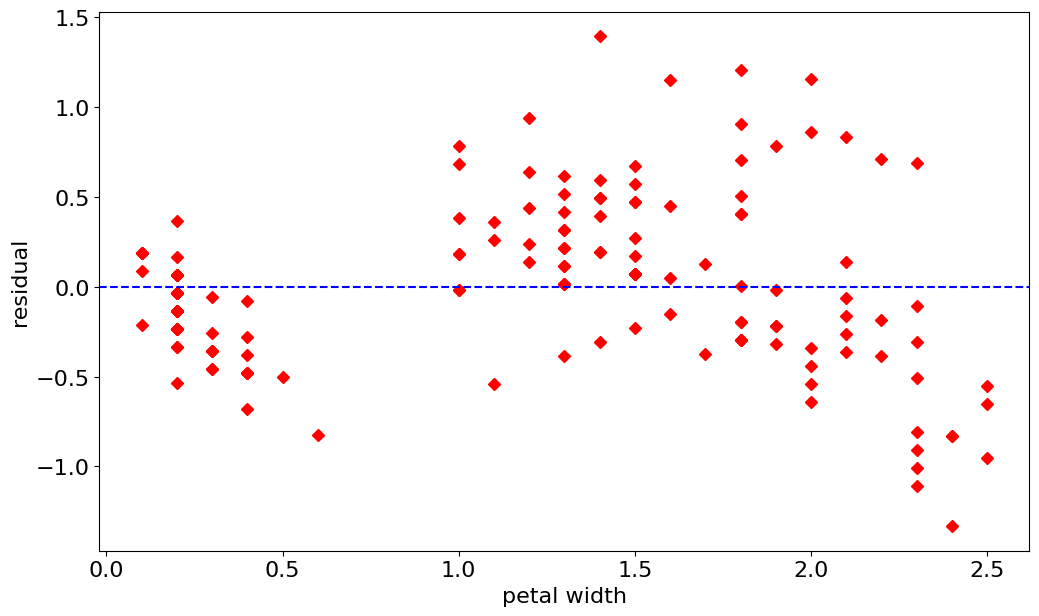

(array([ 1.,  0.,  3.,  0.,  0.,  3.,  3.,  5.,  3.,  5.,  7.,  6.,  5.,
        13., 14., 14., 11., 13.,  9., 11.,  8.,  4.,  3.,  0.,  4.,  2.,
         1.,  1.,  0.,  1.]),
 array([-1.39318842, -1.30232558, -1.21146274, -1.12059989, -1.02973705,
        -0.93887421, -0.84801136, -0.75714852, -0.66628568, -0.57542283,
        -0.48455999, -0.39369715, -0.3028343 , -0.21197146, -0.12110862,
        -0.03024577,  0.06061707,  0.15147992,  0.24234276,  0.3332056 ,
         0.42406845,  0.51493129,  0.60579413,  0.69665698,  0.78751982,
         0.87838266,  0.96924551,  1.06010835,  1.15097119,  1.24183404,
         1.33269688]),
 <BarContainer object of 30 artists>)

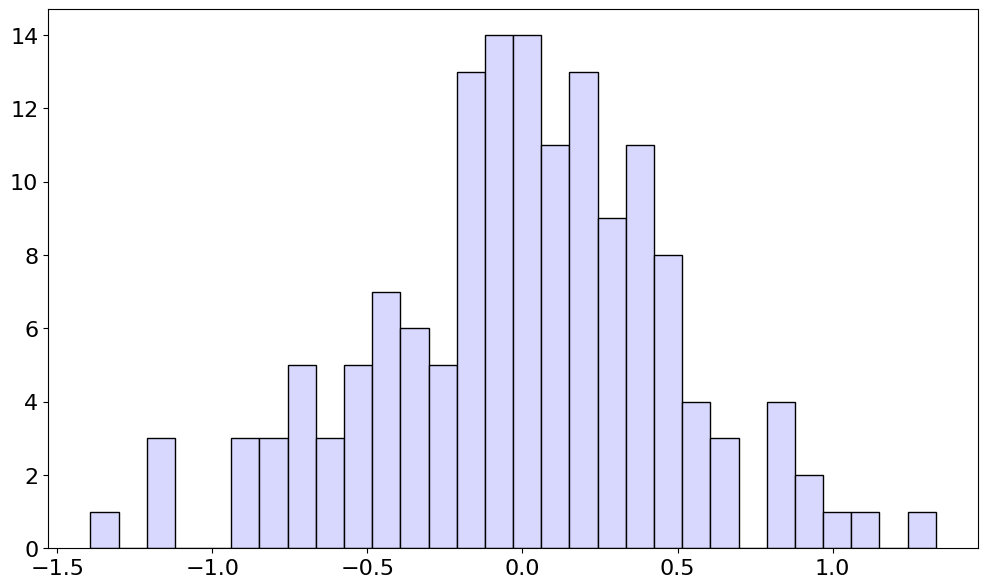

In [9]:
def residus(y,y_hat):
    return y-y_hat

plot(pw,residus(pl,pl_hat(a,b,pw)), linestyle='', marker="D", color='red')
axhline(y = 0, color = 'b',linestyle='--')
xlabel("petal width")
ylabel("residual")
show()

hist(residus(pl_hat(a,b,pw),pl), 30, cumulative=False,label='Training set',color='#d8d8ff', edgecolor='black',align='mid')

<div class="rq">
    
- Le premier graphique semble montrer une distribution al√©atoire de la diff√©rence entre pr√©diction et valeur observ√©e
- L'histogramme montre une distribution "en cloche" (c'est-√†-dire gaussienne) des r√©sidus, ce qui confirme qu'il semble y avoir une relation lin√©aire entre largeur et longueur de p√©tale

</div>
<div class="rqE">

- The first graph seems to show a random distribution of the difference between prediction and observed value
- The histogram shows a "bell-shaped" (i.e. gaussian) distribution of the residuals, which confirms that there seems to be a linear relationship between petal width and length
    
</div>

<div class="app">

<b> La partie ci-dessous est optionnelle.</b>
L'objectif de cette partie est de tracer le nuage de points et l'histogramme √† l'aide du module <code>seaborn</code>, qui permet :
- de tracer une repr√©sentation graphique de meilleure qualit√©
- de tracer l'histogramme des r√©sidus par cat√©gorie d'iris

    
On va en outre tracer les histogrammes en parall√®le du nuage de points, c'est-√†-dire avec la m√™me √©chelle des ordonn√©es
</div>
<div class="appE">
    
<b>The section below is optional.</b>
The goal of this part is to plot the scatter plot and the histogram using the `seaborn module`, which allows :
- to plot a better quality graphic representation
- to plot the histogram of the residuals by iris category

We will also plot the histograms next to the scatterplot, *i.e.* with the same y-axis scale
</div>

(-2.0, 2.0)

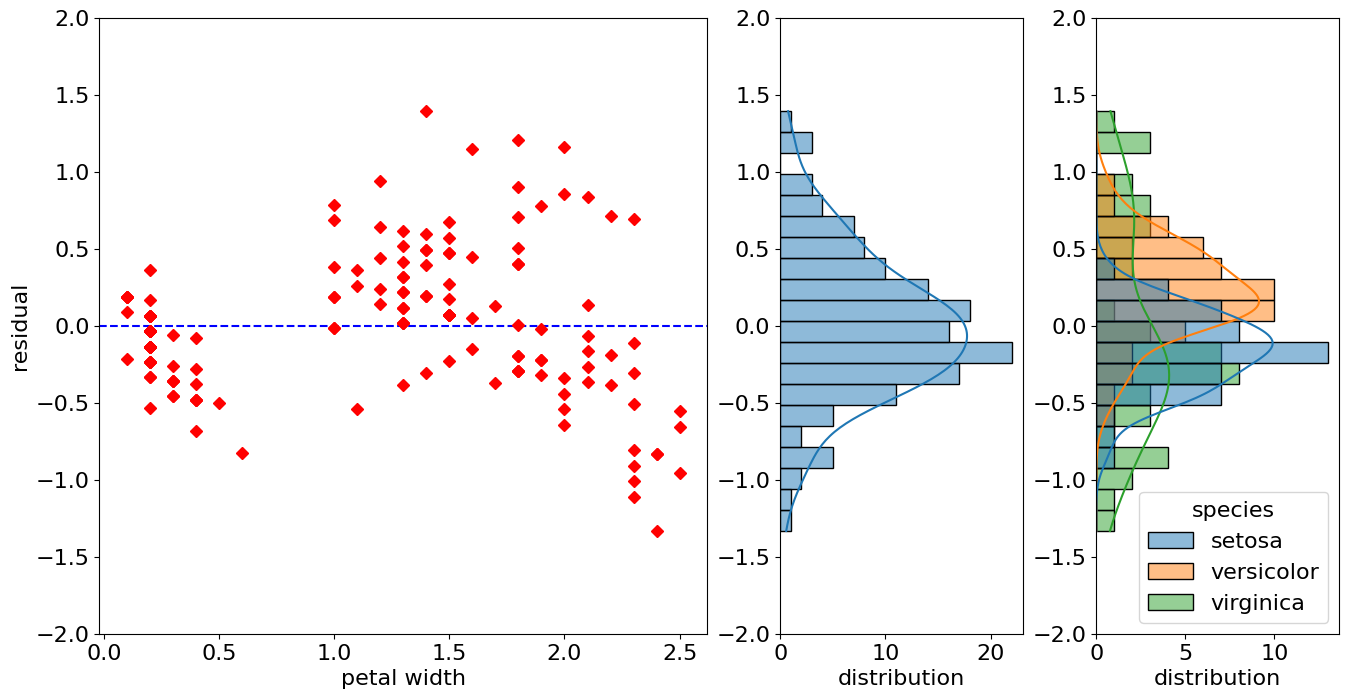

In [10]:
import seaborn as sns
from matplotlib import gridspec
def residus(y_hat,y):
    return y-y_hat
species=dfi["species"]
nbins=20
limit=2
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 3, width_ratios=[2.5, 1, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(pw,residus(pl_hat(a,b,pw),pl), linestyle='', marker="D", color='red')
xlabel("petal width")
ylabel("residual")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("petal width")
xlabel("distribution")
sns.histplot(y=residus(pl_hat(a,b,pw),pl),bins=nbins,kde=True)
plt.ylim(-limit,limit)
plt.subplot(gs[2])
xlabel("distribution")
sns.histplot(y=residus(pl_hat(a,b,pw),pl),bins=nbins,hue=species,kde=True)
plt.ylim(-limit,limit)

<div class="rq">

- C'est esth√©tiquement plus styl√©
- On visualise mieux la distribution gaussienne de l'erreur globale (premier histogramme)
- On voit sur l'histogramme de droite que la distribution de l'erreur pour l'esp√®ce *virginica* s'√©loigne d'une courbe "en cloche". Par manque de donn√©es ?
</div>

<div class="rqE">
    
- It is aesthetically more elegant
- We can better visualize the gaussian distribution of the global error (first histogram)
- We can see on the right histogram that the distribution of the error for the species *virginica* is moving away from a bell curve. Because of a lack of data?
</div>

#### Pr√©diction de la longueur d'un p√©tale d'Iris, connaissant sa largeur

<div class="app">
Un botaniste a d√©couvert au fond de son jardin un Iris de la famille <i>setosa</i>, dont les p√©tales sont de largeur 0.25 cm.
<ol>
    <li> quelle est la longueur de p√©tale peut-on pr√©dire, √† partir de la base de donn√©es "iris"? (indice : utilisez la fonction <code>y_hat</code>)
    <li> la longueur mesur√©e est en fait de 1.45 cm. Quelle est l'erreur quadratique commise par le mod√®le statistique ? (indice: utiliser la fonction <code>MSE()</code> import√©e de la biblioth√®que <code>scikit-learn</code>)
</ol> 
</div>
<div class="appE">
A botanist discovered at the bottom of his garden an iris of the <i>setosa</i> family, whose petals are 0.25 cm wide.
<ol>
    <li> what is the length of the petal that can be predicted from the "iris" database? (hint: use the <code>y_hat</code> function)
    <li> the measured length is in fact 1.45 cm. What is the squared error made by the statistical model? (hint: use the <code>MSE()</code> function imported from the <code>scikit-learn</code> library)
</ol> 
</div>

In [11]:
largeur_hat=pl_hat(a,b,0.25)
print(largeur_hat)

1.647043472515855


<div class="rq">

<b>Attention !</b><br>
La documentation de la fonction `mean_squared_error` (import√©e en tant que `MSE`) pr√©cise que l'appel est de la forme <code>mean_squared_error(y_true, y_pred)</code>, o√π <code>y_true</code> et <code>y_pred</code> sont des **tableaux**. </div>

<div class="rqE">

<b>Attention!</b><br>
The documentation for the `mean_squared_error` function (imported above as `MSE`) states that the call is of the form `mean_squared_error(y_true, y_pred)`, where `y_true` and `y_pred` are **arrays**.</div>

In [12]:
print(MSE([1.45],[largeur_hat]))

0.038826130061106495


### R√©gression polynomiale avec la fonction `polyfit()` de `numpy`<br>*Polynomial regression with the `polyfit()` function of `numpy`*

#### Rappel : allure de fonctions polynomiales simples<br>*Reminder : shape of simple polynomial functions*

<div class="intro">

On va d'abord tracer les fonctions polynomiales d'ordre 1 √† 6, en tant que rappel de cours. Pour mieux organiser la sortie, on va exploiter la fonction `subplot_mosaic()` de `matplotlib` (cf Th√®me "*trac√© de fonctions*")
</div>
<div class="introE">

We will first plot the *n*th order polynomial functions (*n*=1-6), as a refresher course. To better organize the output, we will use the `subplot_mosaic()` function of `matplotlib` (see Theme "plotting functions")</div>

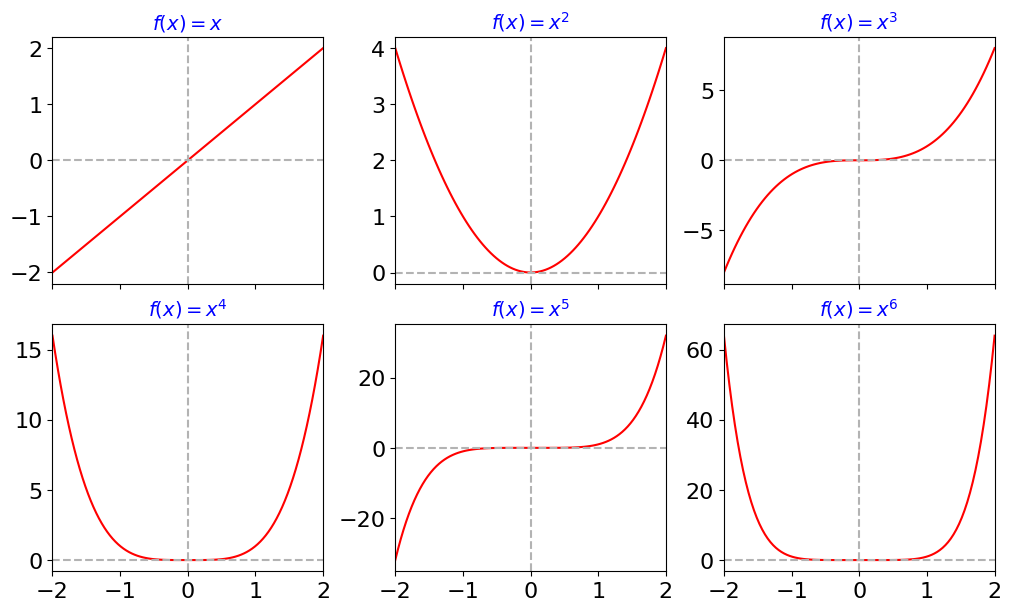

In [13]:
mosaic = [[1,2,3],
         [4,5,6]]
fig, ax = subplot_mosaic(mosaic, constrained_layout=True,figsize=(10,6),sharex=True,sharey=False)

xmin = -2
xmax = 2
npt = 100
# g√©n√©ration de n points √©quir√©partis entre xmin et xmax
x = np.linspace(xmin, xmax, npt)

ax[1].set_xlim(xmin,xmax)
ax[1].plot(x, x,color='red')
ax[1].set_title("$f(x)=x$", fontsize=14, color="blue")
ax[1].axvline(x = 0, color = '0.7',linestyle='--')
ax[1].axhline(y = 0, color = '0.7',linestyle='--')

ax[2].plot(x, x**2,color='red')
ax[2].set_title("$f(x)=x^2$", fontsize=14, color="blue")
ax[2].axvline(x = 0, color = '0.7',linestyle='--')
ax[2].axhline(y = 0, color = '0.7',linestyle='--')

ax[3].plot(x, x**3,color='red')
ax[3].set_title("$f(x)=x^3$", fontsize=14, color="blue")
ax[3].axvline(x = 0, color = '0.7',linestyle='--')
ax[3].axhline(y = 0, color = '0.7',linestyle='--')

ax[4].plot(x, x**4,color='red')
ax[4].set_title("$f(x)=x^4$", fontsize=14, color="blue")
ax[4].axvline(x = 0, color = '0.7',linestyle='--')
ax[4].axhline(y = 0, color = '0.7',linestyle='--')

ax[5].plot(x, x**5,color='red')
ax[5].set_title("$f(x)=x^5$", fontsize=14, color="blue")
ax[5].axvline(x = 0, color = '0.7',linestyle='--')
ax[5].axhline(y = 0, color = '0.7',linestyle='--')

ax[6].plot(x, x**6,color='red')
ax[6].set_title("$f(x)=x^6$", fontsize=14, color="blue")
ax[6].axvline(x = 0, color = '0.7',linestyle='--')
ax[6].axhline(y = 0, color = '0.7',linestyle='--')

#### Lecture d'un polyn√¥me & r√©gression<br>*Reading of a polynomial & regression*

<div class="intro">

On commence par lire un fichier csv, qui est constitu√© de 2 colonnes de donn√©es (X, puis Y) s√©par√©es par une tabulation (`delimiter='\t'`). On trace ensuite Y en fonction de X

</div>

<div class="introE">
    
We start by reading a csv file, which consists of 2 columns of data (X, then Y) separated by a tab (`delimiter='\t'`). Then we plot Y according to X

</div>

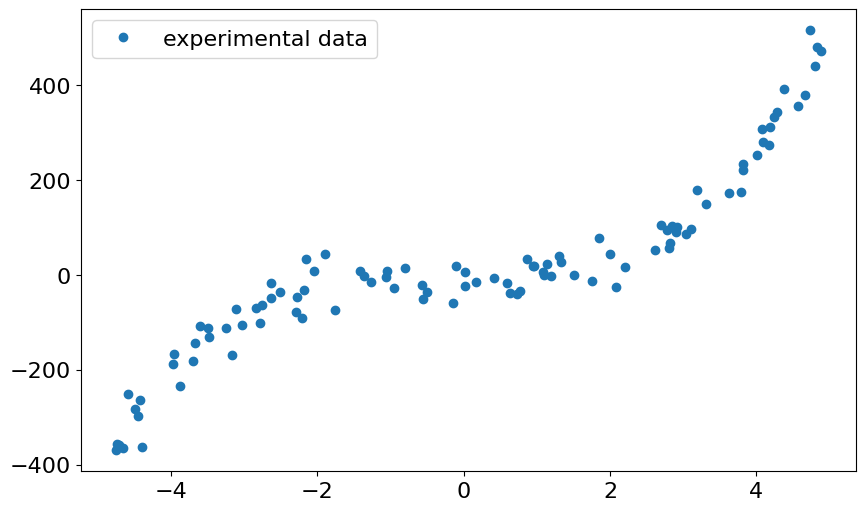

In [14]:
X, Y = np.loadtxt('DS4B-iris-data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)
plt.rcParams["figure.figsize"] = (10,6) #on ajuste la taille du graphique
plt.plot(X, Y,linestyle='', marker='o', label="experimental data")
legend()

<div class="rq">
La fonction ressemble √† un polyn√¥me d'ordre impair.
<li>Essayons d'abord un <i>fit</i> des donn√©es par un polyn√¥me d'ordre 3, c'est-√†-dire du type $ax^3+bx^2+cx+d$
<li>Puis on va afficher les param√®tres du polyn√¥me
<li>Enfin, on va tracer les donn√©es et le polyn√¥me optimois√© sur un m√™me graphe 
</div>

<div class="rqE">
The function looks like an odd-order polynomial.
<li>Let's first try to fit the data by a 3rd-order polynomial, <i>i.e.</i> of the type $ax^3+bx^2+cx+d$
<li>Then we will display the parameters of the polynomial
<li>Finally, we will plot the data and the fitted polynomial on the same graph
</div>

[ 3.90369805  2.2986415  -3.10758575 -9.49137401]
  3.90x^3 +   2.30x^2 +  -3.11x +  -9.49
       3         2
3.904 x + 2.299 x - 3.108 x - 9.491


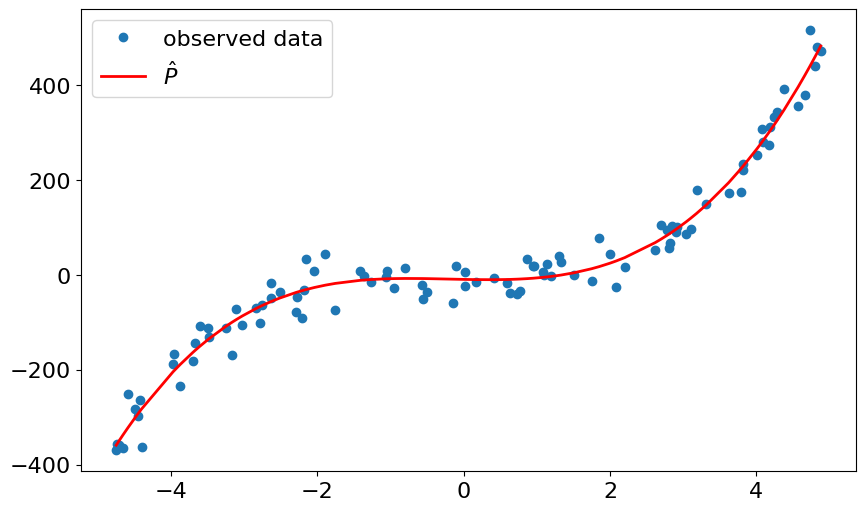

In [24]:
# the polyfit routine is called with the X & Y arrays, and the order of the model polynomial.
# It will return the coefficients a, b, c, & d of the polynomial, stored in the PFit3 list
PFit3 = np.polyfit(X, Y, 3)

# print the parameters of the 3rd-order polynomial
print(PFit3)
# formatted print of the parameters
print(f"{PFit3[0]:6.2f}x^3 + {PFit3[1]:6.2f}x^2 + {PFit3[2]:6.2f}x + {PFit3[3]:6.2f}")

# no need to copy/paste the values of a, b, c, d. We will use poly1d directly, passing PFit3 as a parameter
# poly1d is part of NumPy. For example, poly1d (3, 2, 6) returns 3x^2 + 2x + 6.
P_hat3  = np.poly1d(PFit3)
print(P_hat3)

# scatter plot and curve plot of the optimized polynomial
plt.plot(X, Y,linestyle='', marker='o', label="observed data")
plt.plot(X, P_hat3(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()

<div class="rq">
On constate une tr√®s bonne superposition. On va maintenant calculer les erreurs moyennes (MAE et MSE)</div>
<div class="rqE">
We can see a very good superposition. We will now calculate the average errors (MAE and MSE)</div>

In [16]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y,P_hat3(X)):8.3f}\nMAE ={MAE(Y,P_hat3(X)):8.3f}")

MSE =  954.139
MAE =  24.409


<div class="rq">
Se pourrait-il qu'un polyn√¥me d'ordre 5 permette un meilleur fit ? On va mettre en &oelig;uvre toute la proc√©dure en finissant par le calcul des erreurs</div>
<div class="rqE">
Could it be that a polynomial of order 5 allows a better fit? We are going to implement the whole procedure by finishing with the calculation of the errors</div>

         5            4        3         2
0.01938 x + 0.005088 x + 3.37 x + 2.191 x - 0.2359 x - 9.304
MSE =  949.405
MAE =  24.311


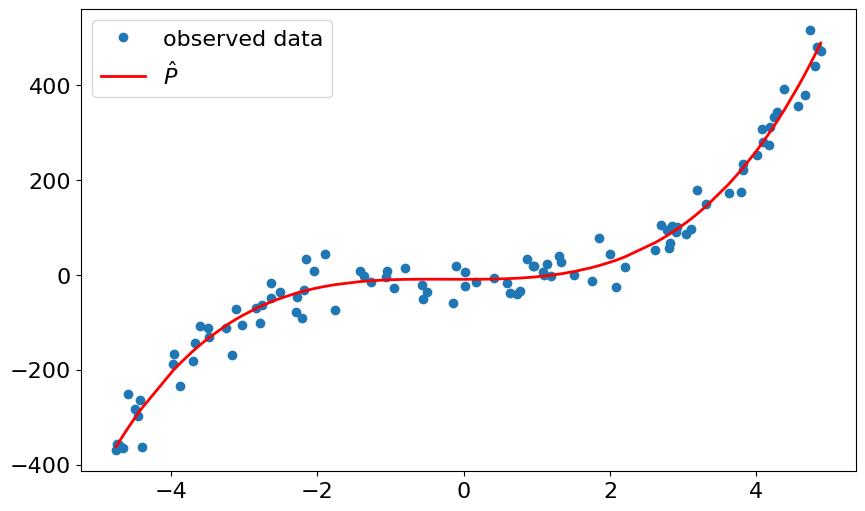

In [17]:
PFit5 = np.polyfit(X, Y, 5)
P_hat5  = np.poly1d(PFit5)
print(P_hat5)
plt.plot(X, Y,linestyle='', marker='o', label="observed data")
plt.plot(X, P_hat5(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat5(X)):8.3f}\nMAE ={MAE(Y,P_hat5(X)):8.3f}")

<div class="rq">
    Compte tenu des faibles coefficients associ√©s aux ordres √©lev√©s ($x^5$ et $x^4$) il s'agit bien d'une fonction polynomiale d'ordre 3. La l√©g√®re diminution de la MAE et de la MSE montre que l'introduction des ordres 4 et 5 permet de diminuer l√©g√®rement l'√©cart entre fonction pr√©dite et fonction r√©elle.<span style="color:red;"><b> Mais √ßa n'est pas forc√©ment une bonne chose (</b>cf paragraphe "surapprentissage").</span><br> <br>
    En fait, la fonction trac√©e a √©t√© g√©n√©r√©e en "bruitant" le polyn√¥me $4x^3+2x^2-3x-6$.<br>
    La comparaison avec les coefficients polynomiaux issus du fit montre qu'il vaut donc mieux chercher √† fitter les donn√©es avec l'ordre polynomial le plus appropri√©, m√™me si en apparrence on r√©duit l'erreur.
</div>
<div class="rqE">
    Given the low coefficients associated with the high orders ($x^5$ and $x^4$) it is indeed a 3rd-order polynomial. The slight decrease of the MAE and the MSE shows that the introduction of orders 4 and 5 allows to slightly decrease the gap between predicted and real values. <span style="color:red;"><b>But this is not necessarily a good thing</b> (see "overfitting" section)</span><br> <br>
    In fact, the plotted function was generated by adding noise to the polynomial $4x^3+2x^2-3x-6$.<br>
    The comparison with the polynomial coefficients resulting from the fit shows that it is therefore better to try to fit the data with the most appropriate polynomial order, even if it appears to reduce the error.
</div>

In [18]:
print(f"{color.BOLD}{color.RED}Pour m√©moire :{color.OFF}")
print("Polyn√¥me d'ordre 3 :")
print(P_hat3)
print(f"Polyn√¥me d'ordre 5 :")
print(P_hat5)

Pour m√©moire :
Polyn√¥me d'ordre 3 :
       3         2
3.904 x + 2.299 x - 3.108 x - 9.491
Polyn√¥me d'ordre 5 :
         5            4        3         2
0.01938 x + 0.005088 x + 3.37 x + 2.191 x - 0.2359 x - 9.304


<div class="rq">
    <b> Pourquoi ne retrouve-t-on pas exactement l'√©quation $4x^3+2x^2-3x-6$ ?</b><br>
        √Ä cause du bruit ajout√© √† la fonction.<br><br>
    <b>Remarque. </b>On a introduit un bruit = 30. Un commentaire ? (<i>Suggestion: regarder la MAE...</i>)
</div>
<div class="rqE">
    <b> Why is the equation $4x^3+2x^2-3x-6$  not accurately found?</b><br>
        Because of the noise added to the function..<br><br>
    <b>Comment. </b>The added noise = 30. Any comment ? (<i>Suggestion: look at the MAE...</i>)
</div>

#### Surapprentissage<br>*overfitting*

<div class="intro">

On va reprendre le m√™me jeu de donn√©es, mais on va essayer de r√©duire l'erreur, en consid√©rant un ordre tr√®s √©lev√©: 31!
</div>
<div class="introE">
    
We will use the same data set, but we will try to reduce the error, by considering a very high order: 31!
</div>

           31             30             29             28
1.132e-11 x  - 3.712e-11 x  - 1.925e-09 x  + 6.209e-09 x 
              27             26             25             24
 + 1.472e-07 x  - 4.669e-07 x  - 6.691e-06 x  + 2.085e-05 x 
              23             22            21           20           19
 + 0.0002012 x  - 0.0006154 x  - 0.004215 x  + 0.01264 x  + 0.06308 x 
           18          17         16         15         14         13
 - 0.1853 x  - 0.6803 x  + 1.956 x  + 5.268 x  - 14.84 x  - 28.83 x 
          12         11         10       9         8         7        6
 + 79.67 x  + 108.1 x  - 294.7 x  - 264 x + 717.9 x + 384.9 x - 1069 x
          5         4         3         2
 - 287.3 x + 848.5 x + 80.12 x - 252.4 x + 3.926 x - 9.607
MSE =  645.775
MAE =  20.085


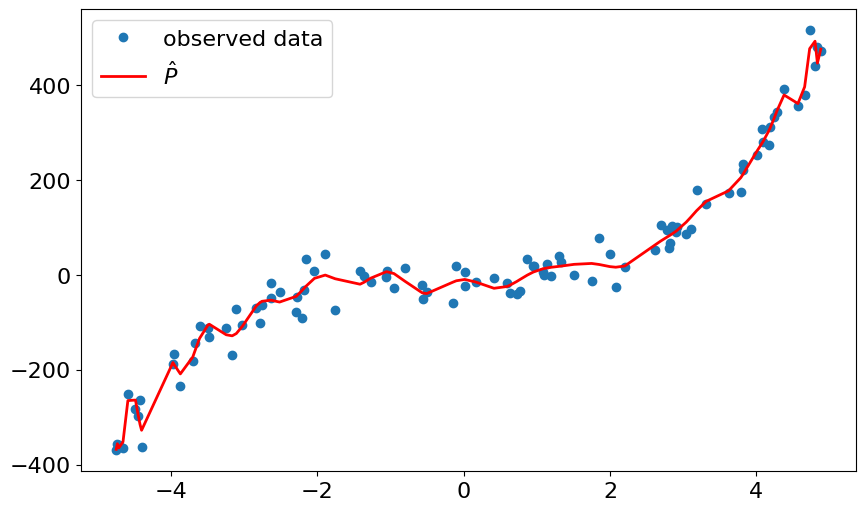

In [19]:
PFit31 = np.polyfit(X, Y, 31)
P_hat31  = np.poly1d(PFit31)
print(P_hat31)
plt.plot(X, Y,linestyle='', marker='o', label="observed data")
plt.plot(X, P_hat31(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat31(X)):8.3f}\nMAE ={MAE(Y,P_hat31(X)):8.3f}")

<div class="rq">
    L'√©cart entre points exp√©rimentaux et fonction polynomiale a beaucoup diminu√© (cf MAE & MSE). L'augmentation de l'ordre permet de passer au plus pr√®s d'un grand nombre de points. <br>
    Lorsqu'on examine les valeurs des coefficients on s'aper√ßoit qu'on s'√©loigne beaucoup de la loi r√©elle  ($4x^3+2x^2-3x-6$) qui relie $x$ et $y$. Les coefficient associ√©s √† $x^3$, $x^2$ et $x$ sont m√™me totalement farfelus !<br>
    Dans le contexte de la <b>science des donn√©es et de l'apprentissage automatique</b>, on parlerait de <span style="color:red"><b>surapprentissage</b></span> (overfitting) : le mod√®le polynomial sait reproduire beaucoup de d√©tails, mais <b>il est pass√© √† c√¥t√© du ph√©nom√®ne global</b>, d√©crit ici par l'√©quation $4x^3+2x^2-3x-6$.
</div>
<div class="rqE">
    The gap between the experimental points and the polynomial function has decreased a lot (cf MAE & MSE). The increase of the order allows us to get closer to a large number of points. <br>
When we examine the values of the coefficients we see that we are far from the real law ($4x^3+2x^2-3x-6$) which links $x$ and $y$. The coefficients associated to $x^3$, $x^2$ and $x$ are even totally crazy ! <br>

In the context of <b>data science and machine learning</b>, this would be named <span style="color:red"><b>overfitting</b></span>: the polynomial model is able to reproduce a lot of details, but <b>it has missed the global phenomenon</b>, described here by the equation $4x^3+2x^2-3x-6$.
</div>

### R√©gression avec la biblioth√®que `SciPy`<br>*Regression with the `SciPy` library*

<div class="intro">

La fonction `curve_fit` du module `scipy` pr√©sente l'int√©r√™t de pouvoir √©tablir des corr√©lations plus complexes que des fonctions affines ou polynomiales.

L'utilisation de `curve_fit` n√©cessite deux √©tapes :

- d√©finir la relation math√©matique √† mod√©liser sous forme d'une fonction python `f(x,a,b,c...)` qui prend comme arguments la valeur en abscisse `x`, puis les coefficients `(a,b,c...)` du mod√®le √† d√©terminer

- utiliser la fonction `curve_fit` avec comme arguments la fonction python `f`, les donn√©es `x` et les donn√©es `y`
</div>
<div class="introE">

The `curve_fit` function of the `scipy` library has the advantage of being able to establish more complex correlations than linear or polynomial functions.

Using `curve_fit` requires two steps:

- define the mathematical relationship to be modeled in the form of a python function `f(x,a,b,c...)` which takes as arguments the `x`, then the coefficients `(a,b,c...)` of the model to be determined 

- use the `curve_fit` function with as arguments the python function `f`, the array `x` and the associated array `y`
</div>

#### Appel des biblioth√®ques<br>*Importation of the libraries*

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

#### Mise en &oelig;uvre du fit<br>*Fitting process*

In [21]:
def P3(x,a,b,c,d):
    P =  a*x**3 + b*x**2 + c*x + d
    return P

X, Y = np.loadtxt('DS4B-iris-data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)

PFit3b, _ = curve_fit(P3, X, Y)
P_hat3b  = np.poly1d(PFit3b)
#affichage des param√®tres du polyn√¥me
print(P_hat3b)
print()
print(f"{color.BLUE}{color.BOLD}√† comparer au r√©sultat du fit avec polyfit :{color.OFF}")
print(P_hat3)

       3         2
3.904 x + 2.299 x - 3.108 x - 9.491

√† comparer au r√©sultat du fit avec polyfit :
       3         2
3.904 x + 2.299 x - 3.108 x - 9.491


<div class="rq">
    On a utilis√© deux biblioth√®ques diff√©rentes (<code>NumPy</code> et <code>SciPy</code>), qui heureusement donnent le m√™me r√©sultat.<br>
    <li> <code>polyfit</code> est plus facile √† utiliser pour une r√©gression polynomiale
    <li> <code>curve_fit</code> est beaucoup plus g√©n√©ral, puisqu'on peut fitter n'importe quelle fonction math√©matique, pas uniquement des polyn√¥mes
</div>
<div class="rqE">
We used two different libraries (<code>NumPy</code> and <code>SciPy</code>), which thankfully give the same result.
<li> <code>polyfit</code> is easier to use for polynomial regression
<li> <code>curve_fit</code> is much more general, since any mathematical function can be fitted, not only polynomials
</div>

### Bilan de la deuxi√®me partie<br>*Review of this second part*

<div class="rq">
    
- on a pu d√©terminer l'√©quation d'une fonction math√©matique qui refl√®te le lien entre deux ensembles de variables $(x, y)$, qui sont toutes deux tir√©es d'observations

- en d'autres termes, on a recherch√© la fonction math√©matique permettant de d√©crire le comportement de la variable statistique $y$ en fonction d'une autre variable statistique $x$

- m√™me s'il existe des grandeurs qui permettent d'avoir un aper√ßu global de la qualit√© de l'ajustement (MAE, MSE, $R^2$), c'est insuffisant : il faut exercer un regard critique par le trac√© des r√©sidus

- dans le cas o√π le "*fitting*" semble convaincant, cette fonction math√©matique, $\hat{y}=f(x)$, va permettre de pr√©dire $y$ pour une valeur de $x$ quelconque. **Attention !** Il est dans la plupart des cas dangereux d'extrapoler en dehors de l'intervalle de la variable $x$ mesur√©e (observ√©e).
</div>

<div class="rqE">

- we were able to determine the equation of a mathematical function that represents the relationship between two sets of variables $(x, y)$, both of which are obtained from observations

- in other words, we looked for the mathematical function allowing to describe the behavior of the statistical variable $y$ as a function of another statistical variable $x$
 
- even if there are quantities that give an overall view of the quality of the fitting (MAE, MSE, $R^2$), this is not enough: it is necessary to exercise critical thinking, by plotting the residuals

- in the case where the fitting seems convincing, this mathematical function, $\hat{y}=f(x)$, will allow to predict $y$ for any value of $x$. **Be careful!** It is in most cases dangerous to extrapolate outside the range of the measured variable $x$
</div>

### Chapitre suivant : l'apprentissage supervis√© (supervised Machine Learning) appliqu√© √† la classification (r√©gression logistique)<br>*Next chapter: supervised Machine Learning applied to logistic regression*

<div class="intro">
    
On attire aussi l'attention sur un point important : on s'est servi de **toutes** les observations $(x_i,y_i)$ pour d√©terminer l'√©quation de la fonction math√©matique $f(x)$. Pourquoi appuyer sur ce point ? Car avec les algorithmes d'apprentissage automatique (machine learning) on ne se sert que d'une partie des donn√©es pour l'apprentissage, le reste √©tant utilis√© pour tester la fiabilit√© de l'algorithme. On va voir √ßa dans le [chapitre suivant](./DS4B-Iris3.ipynb).


N'oubliez pas de faire d'abord [l'exercice associ√© √† ce chapitre](./DS4B-Exercices/DS4B-Iris2-Exercice.ipynb).

</div>

<div class="introE">
    
Attention is also called to an important point: **all** observations $(x_i,y_i)$ were used to determine the equation of the mathematical function $f(x)$ . Why focus on this point? Because machine learning algorithms only use a part of the data for learning, the rest being used to test the reliability of the algorithm. We will see this in the [next chapter](./DS4B-Iris3.ipynb).

Don't forget to do the [exercise associated with this chapter](./DS4B-Exercices/DS4B-Iris2-Exercice.ipynb) first.

</div>

### √âvaluation formative apr√®s la vid√©o

Voir les quizz (uniquement pour les √©tudiants d'UT3, cf Moodle)

In [22]:
vID.end(cwd0)

**Fin √†:** Sunday 03 December 2023, 15:09:50  
**Dur√©e:** 00:00:50 990ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>